# 1. 고객 특성관련 분석

In [4]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
import pandas as pd
import numpy as np

weather_data = pd.read_csv("./data/weather_data.csv", encoding='CP949')

# 컬럼이름 변경
weather_data.columns = weather_data.columns.str.replace('bigcon_weather.','')

weather_data.head()

,tm,stn_id,pvn_nm,bor_nm,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [4]:
gs25_data = pd.read_csv("./data/GS25.csv", encoding='CP949')

# 컬럼이름 변경
gs25_data.columns = gs25_data.columns.str.replace('korea_cvs.','')

gs25_data.head()

,pvn_nm,sale_dt,gen_cd,age_cd,category,adj_qty,bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [4]:
gs25_data.shape

(2707786, 7)

In [5]:
weather_data.shape

(59113, 11)

In [12]:
weather_data['pvn_nm'].value_counts()

서울특별시    27395
경기도      26264
인천광역시     5454
Name: pvn_nm, dtype: int64

In [4]:
weather = weather_data[(weather_data['pvn_nm']=='서울특별시') & (weather_data['bor_nm']=='종로구')]
weather

,tm,stn_id,pvn_nm,bor_nm,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn
2192,20160101,108,서울특별시,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0
2193,20160102,108,서울특별시,종로구,9.5,4.5,1.0,5.7,77.0,2.0,0.0
2194,20160103,108,서울특별시,종로구,9.4,4.0,5.1,6.5,81.0,1.8,0.0
2195,20160104,108,서울특별시,종로구,5.3,5.1,-2.5,2.0,54.0,3.1,0.0
2196,20160105,108,서울특별시,종로구,1.5,4.6,-4.8,-2.7,39.0,2.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3283,20181227,108,서울특별시,종로구,-6.5,5.8,-12.5,-10.1,28.0,3.5,0.0
3284,20181228,108,서울특별시,종로구,-6.6,4.4,-14.4,-10.5,33.0,2.5,0.0
3285,20181229,108,서울특별시,종로구,-3.0,5.5,-10.5,-7.6,29.0,2.9,0.0
3286,20181230,108,서울특별시,종로구,-0.9,3.1,-11.3,-6.8,36.0,1.2,0.0


In [5]:
gs25 = gs25_data[(gs25_data['pvn_nm']=='서울특별시') & (gs25_data['bor_nm']=='종로구')]
gs25['gen_age_cd'] = gs25.loc[:,'gen_cd']+'_'+gs25.loc[:,'age_cd']

<ipython-input-5-ef803df70faf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs25['gen_age_cd'] = gs25.loc[:,'gen_cd']+'_'+gs25.loc[:,'age_cd']


In [10]:
gs25.head(5)

,pvn_nm,sale_dt,gen_cd,age_cd,category,adj_qty,bor_nm,gen_age_cd
0,서울특별시,20160101,F,00~19,라면,7,종로구,F_00~19
1,서울특별시,20160101,F,20~39,과자,655,종로구,F_20~39
2,서울특별시,20160101,F,20~39,라면,282,종로구,F_20~39
3,서울특별시,20160101,F,20~39,마스크,35,종로구,F_20~39
4,서울특별시,20160101,F,20~39,맥주,183,종로구,F_20~39


In [43]:
pd.unique(gs25['gen_age_cd'])

array(['F_00~19', 'F_20~39', 'F_40~59', 'F_60~99', 'M_00~19', 'M_20~39',
       'M_40~59', 'M_60~99'], dtype=object)

In [6]:
gs25['sale_year'] = gs25['sale_dt'].astype(str).str[:4]
gs25.head()

<ipython-input-6-421d51a23df9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gs25['sale_year'] = gs25['sale_dt'].astype(str).str[:4]


,pvn_nm,sale_dt,gen_cd,age_cd,category,adj_qty,bor_nm,gen_age_cd,sale_year
0,서울특별시,20160101,F,00~19,라면,7,종로구,F_00~19,2016
1,서울특별시,20160101,F,20~39,과자,655,종로구,F_20~39,2016
2,서울특별시,20160101,F,20~39,라면,282,종로구,F_20~39,2016
3,서울특별시,20160101,F,20~39,마스크,35,종로구,F_20~39,2016
4,서울특별시,20160101,F,20~39,맥주,183,종로구,F_20~39,2016


In [7]:
weather_data = weather.copy()
gs25_data = gs25.copy()

데이터프레임명.loc[인덱스]
데이터프레임명.iloc[행번호]

In [76]:
#gs25 = gs25.drop(['14507'])

#gs25.drop(gs25.iloc[14507])

#gs25_data = gs25_data.drop(gs25_data.index[14507])

gs25_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54294 entries, 0 to 2519456
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pvn_nm      54294 non-null  object
 1   sale_dt     54294 non-null  int64 
 2   gen_cd      54294 non-null  object
 3   age_cd      54294 non-null  object
 4   category    54294 non-null  object
 5   adj_qty     54294 non-null  int64 
 6   bor_nm      54294 non-null  object
 7   gen_age_cd  54294 non-null  object
 8   sale_year   54294 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.1+ MB


In [83]:
"""
from scipy import stats

data_outlier2_num = data_outlier2._get_numeric_data()
print(len(gs25_num))

gs25_zscore = gs25_num[(np.abs(stats.zscore(gs25_num)) < 3).all(axis=1)]

print(len(gs25_zscore)) """

37
36


In [49]:
gs25_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54295 entries, 0 to 2519456
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pvn_nm      54295 non-null  object
 1   sale_dt     54295 non-null  int64 
 2   gen_cd      54295 non-null  object
 3   age_cd      54295 non-null  object
 4   category    54295 non-null  object
 5   adj_qty     54295 non-null  int64 
 6   bor_nm      54295 non-null  object
 7   gen_age_cd  54295 non-null  object
 8   sale_year   54295 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.1+ MB


In [8]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

gs25_data_num = gs25_data._get_numeric_data()
gs25_data_num['adj_qty']

gs25_data['adj_qty_scale'] = StandardScaler().fit_transform(np.array(gs25_data_num['adj_qty']).reshape(-1, 1)).round(4)

In [21]:
gs25_data.head()

,pvn_nm,sale_dt,gen_cd,age_cd,category,adj_qty,bor_nm,gen_age_cd,sale_year,adj_qty_scale
0,서울특별시,20160101,F,00~19,라면,7,종로구,F_00~19,2016,-0.6567
1,서울특별시,20160101,F,20~39,과자,655,종로구,F_20~39,2016,3.8909
2,서울특별시,20160101,F,20~39,라면,282,종로구,F_20~39,2016,1.2732
3,서울특별시,20160101,F,20~39,마스크,35,종로구,F_20~39,2016,-0.4602
4,서울특별시,20160101,F,20~39,맥주,183,종로구,F_20~39,2016,0.5785


In [ ]:
pd.unique(gs25['category'])
'라면',
'과자', 
'마스크', 
'맥주', 
#'생리대', 
#'생수', 
'숙취해소제', 
#'스타킹', 
#'아이스크림',
'탄산음료', 
#'면도기', 
#'우산'

Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

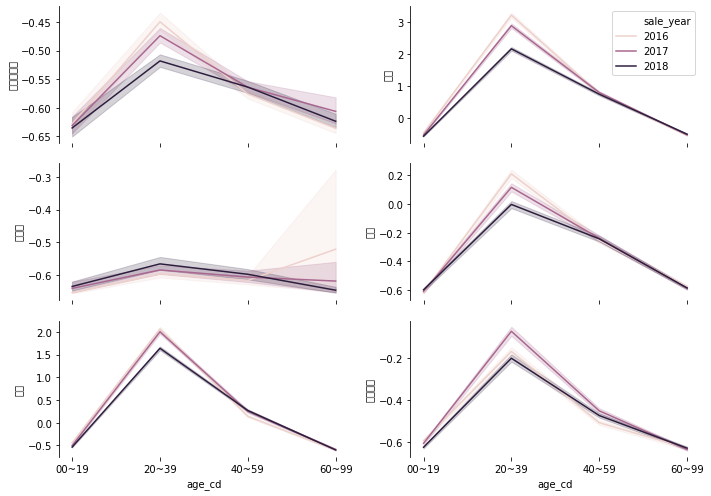

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="white", context="talk")

rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(3, 2, figsize=(10, 7), sharex=True)

# Generate some sequential data
x = gs25_data['age_cd']
y1 = gs25_data[gs25_data['category']=='숙취해소제']['adj_qty_scale']
sns.lineplot(x=x, y=y1, hue=gs25['sale_year'], ax=ax[0,0])  #palette="vlag",
#ax[0,0].axhline(5, linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[0,0].set_ylabel("숙취해소제") 
ax[0,0].get_legend().remove()

# Center the data to make it diverging
y2 = gs25_data[gs25_data['category']=='마스크']['adj_qty_scale']
sns.lineplot(x=x, y=y2, hue=gs25_data['sale_year'], ax=ax[1,0]) #palette="rocket",
#ax[1,0].axhline(5, linestyle='--', alpha=0.5,color="gray",  clip_on=False)
ax[1,0].set_ylabel("마스크")
ax[1,0].get_legend().remove()

# Randomly reorder the data to make it qualitative
y3 = gs25_data[gs25_data['category']=='라면']['adj_qty_scale']
sns.lineplot(x=x, y=y3, hue=gs25['sale_year'], ax=ax[2,0]) # palette="deep",
#ax[2,0].axhline(5,linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[2,0].set_ylabel("라면")
ax[2,0].get_legend().remove()

# Randomly reorder the data to make it qualitative
y4 = gs25_data[gs25_data['category']=='과자']['adj_qty_scale']
sns.lineplot(x=x, y=y4, hue=gs25_data['sale_year'], ax=ax[0,1]) # palette="Wistia",
#ax[0,1].axhline(5,linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[0,1].set_ylabel("과자")
#ax[0,1].legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

# Randomly reorder the data to make it qualitative
y5 = gs25_data[gs25_data['category']=='맥주']['adj_qty_scale']
sns.lineplot(x=x, y=y5,  hue=gs25_data['sale_year'], ax=ax[1,1]) #palette="Purples",
#ax[1,1].axhline(5,linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[1,1].set_ylabel("맥주")
ax[1,1].get_legend().remove()

# Randomly reorder the data to make it qualitative
y6 = gs25_data[gs25_data['category']=='탄산음료']['adj_qty_scale']
sns.lineplot(x=x, y=y6,  hue=gs25_data['sale_year'], ax=ax[2,1]) #palette="ocean",
#ax[2,1].axhline(5,linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[2,1].set_ylabel("탄산음료")
ax[2,1].get_legend().remove()

# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.savefig('gs25_product.png')

In [107]:
gs25_data.describe()

,sale_dt,adj_qty,adj_qty_scale
count,5.429400e+04,54294.000000,54294.000000
mean,2.017051e+07,100.570468,-0.000006
std,8.169660e+03,142.496928,1.000014
min,2.016010e+07,7.000000,-0.656700
25%,2.016093e+07,14.000000,-0.607500
50%,2.017062e+07,42.000000,-0.411000
75%,2.018033e+07,120.000000,0.136400
max,2.018123e+07,1875.000000,12.452500


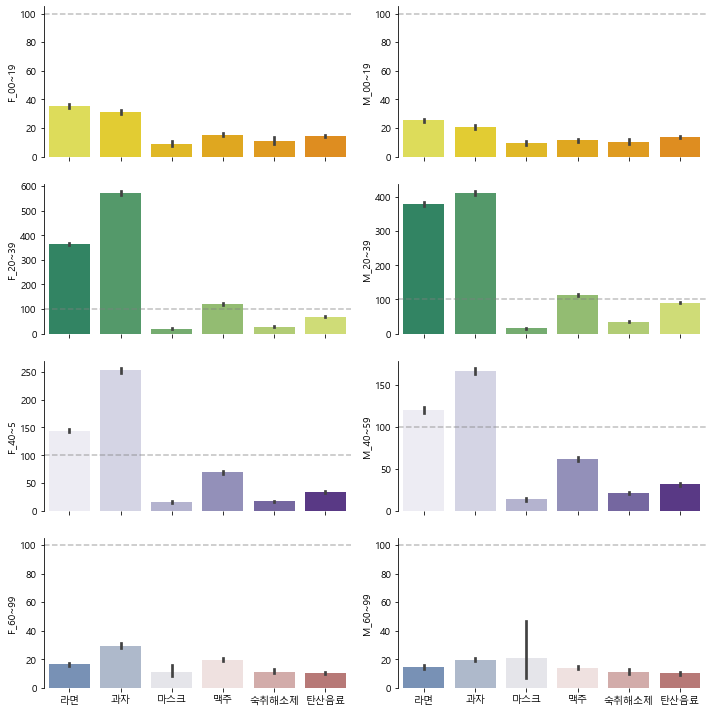

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="white", context="talk")

rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(4, 2, figsize=(10, 10), sharex=True)

#'라면','과자', '마스크', '맥주', '숙취해소제', '탄산음료'
# Generate some sequential data
x = gs25_data[gs25_data['category'].isin(['라면','과자', '마스크', '맥주', '숙취해소제', '탄산음료'])]['category']
y1 = gs25_data[gs25_data['gen_age_cd']=='F_00~19']['adj_qty']
sns.barplot( x=x, y=y1, palette="Wistia", ax=ax[0,0])
ax[0,0].axhline(100, linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[0,0].set_ylabel("F_00~19") 
ax[0,0].set_xlabel(None)

# Center the data to make it diverging
y2 = gs25_data[gs25_data['gen_age_cd']=='F_20~39']['adj_qty']
sns.barplot(x=x, y=y2, palette="summer", ax=ax[1,0])
ax[1,0].axhline(100, linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[1,0].set_ylabel("F_20~39")
ax[1,0].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y3 = gs25_data[gs25_data['gen_age_cd']=='F_40~59']['adj_qty']
sns.barplot(x=x, y=y3, palette="Purples", ax=ax[2,0])
ax[2,0].axhline(100, linestyle='--', alpha=0.5, color="gray", clip_on=False)
ax[2,0].set_ylabel("F_40~5")
ax[2,0].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y4 = gs25_data[gs25_data['gen_age_cd']=='F_60~99']['adj_qty']
sns.barplot(x=x, y=y4, palette="vlag", ax=ax[3,0])
ax[3,0].axhline(100, linestyle='--',alpha=0.5, color="gray", clip_on=False)
ax[3,0].set_ylabel("F_60~99")
ax[3,0].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y5 = gs25_data[gs25_data['gen_age_cd']=='M_00~19']['adj_qty']
sns.barplot(x=x, y=y5, palette="Wistia", ax=ax[0,1])
ax[0,1].axhline(100, linestyle='--',alpha=0.5, color="gray", clip_on=False)
#ax[0,1].text(1.02, 100, "100", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
#           transform=ax[0,1].get_yaxis_transform())
ax[0,1].set_ylabel("M_00~19")
ax[0,1].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y6 = gs25_data[gs25_data['gen_age_cd']=='M_20~39']['adj_qty']
sns.barplot(x=x, y=y6, palette="summer", ax=ax[1,1])
ax[1,1].axhline(100, linestyle='--',alpha=0.5, color="gray", clip_on=False)
#ax[1,1].text(1.02, 100, "100", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
#           transform=ax[1,1].get_yaxis_transform())
ax[1,1].set_ylabel("M_20~39")
ax[1,1].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y7 = gs25_data[gs25_data['gen_age_cd']=='M_40~59']['adj_qty']
sns.barplot(x=x, y=y7, palette="Purples", ax=ax[2,1])
ax[2,1].axhline(100, linestyle='--',alpha=0.5, color="gray", clip_on=False)
#ax[2,1].text(1.02, 100, "100", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
#           transform=ax[2,1].get_yaxis_transform())
ax[2,1].set_ylabel("M_40~59")
ax[2,1].set_xlabel(None)

# Randomly reorder the data to make it qualitative
y8 = gs25_data[gs25_data['gen_age_cd']=='M_60~99']['adj_qty']
sns.barplot(x=x, y=y8, palette="vlag", ax=ax[3,1])
ax[3,1].axhline(100, linestyle='--',alpha=0.5, color="gray", clip_on=False)
#ax[3,1].text(1.02, 100, "100", va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
#           transform=ax[3,1].get_yaxis_transform())
ax[3,1].set_ylabel("M_60~99")
ax[3,1].set_xlabel("")


# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)
plt.savefig('gs25_customer.png')
